In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([-0.24272302, -0.79679701,  0.25865003, -0.07824587,  0.07469666,
       -0.09946984,  0.9736907 , -0.62243994,  0.94033602, -0.32027324])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.24388426, -0.85088422,  0.04019532, -0.87463034,  0.75278823,
       -0.2758443 , -0.27357345, -0.32678712, -0.14158885,  0.04359964])

In [4]:
y = (x1 * 0.3) + (x2 * 0.5) + 0.1 + (np.random.uniform(low=-1.0, high=1.0) * 0.05)
y = 0.0 <= y

print(y.shape)
y[0:10]

(100,)


array([ True, False,  True, False,  True, False,  True, False,  True, False], dtype=bool)

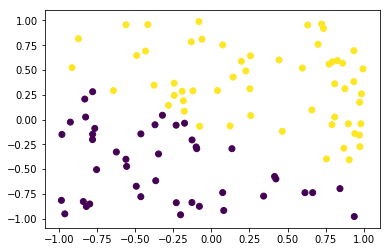

In [5]:
plt.scatter(x1, x2, c=y)

# Gradient Descent

In [6]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(9))

0.000123394575986
0.5
0.999876605424


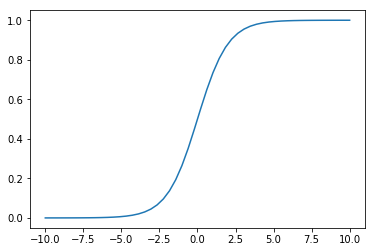

In [7]:
xx = np.linspace(start=-10.0, stop=10.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [8]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + b
    y_predict = sigmoid(y_predict)
    
    predict = (0.5 <= y_predict)
    actual = y
    
    error = (predict != actual).mean()
    if error < 0.01:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
    
print("------------------------")
print("{0:2} error = {1:.5f}, w1 = {2:.5f}, w2 = {3:.5f}, b = {4:.5f}".format(epoch, error, w1, w2, b))

 0 error = 0.25000
10 error = 0.03000
------------------------
16 error = 0.00000, w1 = 1.36252, w2 = 2.37518, b = 0.31899


In [9]:
import pandas as pd

In [10]:
pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict, '맞춤?': (y == predict)}).head()

,x1,x2,y(actual),y(predict),맞춤?
0,-0.242723,0.243884,True,True,True
1,-0.796797,-0.850884,False,False,True
2,0.258650,0.040195,True,True,True
3,-0.078246,-0.874630,False,False,True
4,0.074697,0.752788,True,True,True


In [11]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

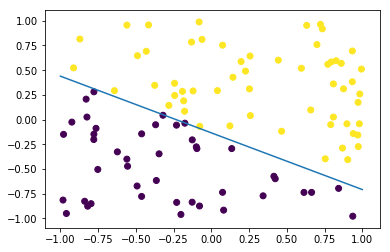

In [12]:
plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

# Multi-class Classification

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

In [15]:
X = iris["data"]

print(X.shape)
X[0:10]

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [16]:
y = iris["target"]

print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
data = pd.DataFrame(X, columns=iris['feature_names'])
data['y'] = y

print(data.shape)
data.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


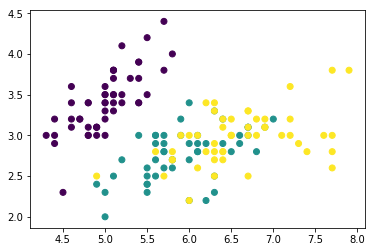

In [19]:
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=y)

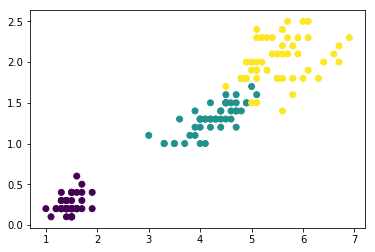

In [20]:
plt.scatter(data["petal length (cm)"], data["petal width (cm)"], c=y)

In [21]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot[0:5]

(150, 3)


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

# Gradient Descent

In [38]:
num_epoch = 1000
learning_rate = 0.01

w = np.random.uniform(low=0.0, high=1.0, size=(4, 3))
b = np.random.uniform(low=0.0, high=1.0, size=3)

for epoch in range(num_epoch):
    y_predict_hot = X.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = y_predict_hot.argmax(axis=1)
    
    error = (y != y_predict).mean()
    
    if error < 0.1:
        break
        
    if epoch % 10 == 0:
        print("[{0:2} error = {1:.5f}]".format(epoch, error))
    
    w = w - learning_rate * X.T.dot(y_predict_hot - y_hot)
    b = b - learning_rate * (y_predict_hot - y_hot).mean(axis=0)

print("----" * 10)
print("[{0:2} error = {1:.5f}]".format(epoch, error))

[ 0 error = 0.66667]
[10 error = 0.59333]
[20 error = 0.33333]
[30 error = 0.33333]
[40 error = 0.33333]
----------------------------------------
[42 error = 0.06667]


In [42]:
result = data.copy()
result["y(predict)"] = y_predict
result["맞춤?"] = result["y"] == result["y(predict)"]

print(result.shape)
result[result["맞춤?"] == False].count()

(150, 7)


sepal length (cm)    10
sepal width (cm)     10
petal length (cm)    10
petal width (cm)     10
y                    10
y(predict)           10
맞춤?                  10
dtype: int64

In [48]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

Exception: URL fetch failure on https://s3.amazonaws.com/img-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:749)